<a href="https://colab.research.google.com/github/Ashish-Tripathy/ComputerVision/blob/master/Asg_4_DNN_4th_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Architectural Highlights of this Iteration
1. For the 4th iteration, I introduce dropout after each convolution layer.
2. I will also increase the batch size to 128, this will decrease the time taken for each epoch and also push the accuracy further

# **Import Libraries and modules**

In [1]:

import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


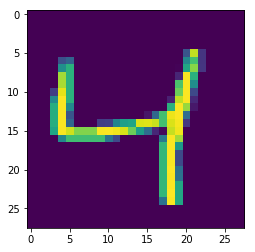

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Building the Architecture

In [11]:
from keras.models import Model
from keras.layers import Input,Conv2D, BatchNormalization,Activation, Flatten

input = Input(shape=(28, 28, 1,))

#defining convolution block
def conv_block(inputs, filters,padding = 'valid'):
  conv = Conv2D(filters = filters, kernel_size = (3,3), padding=padding, use_bias=False)(inputs)
  conv = Dropout(0.1)(conv)
  conv = BatchNormalization()(conv)
  conv = Activation('relu')(conv)
  return conv

#defining transition block
def bottleneck(inputs,filters):
  conv = Conv2D(filters = filters, kernel_size = (1,1), padding = 'valid', use_bias = False)(inputs)
  conv = Dropout(0.1)(conv)
  conv = BatchNormalization()(conv)
  conv = Activation('relu')(conv)
  return MaxPooling2D()(conv)

#Building the architecture
First_Layer  =  conv_block(input, 8) #26 RF 3x3
Second_Layer =  conv_block(First_Layer,12) #24 RF 5x5
Third_Layer  =  conv_block(Second_Layer,16) #22 RF 5x5
Transition_1 =  bottleneck(Third_Layer,12) #11 RF 7x7
Fourth_Layer =  conv_block(Transition_1,16) #9 RF 14x14
Fifth_Layer =  conv_block(Fourth_Layer,32)  #7 RF 16x16 
last1x1      =  Conv2D(filters = 10, kernel_size = (1,1), padding = 'valid', use_bias = False)(Fifth_Layer)
last1x1      =  Activation('relu')(last1x1)
last_layer   =  Conv2D(filters = 10, kernel_size = (7,7), padding = 'valid', use_bias = False)(last1x1) #1; RF 22x22
last_layer   =  BatchNormalization()(last_layer)
flatten      =  Flatten()(last_layer)
output       =  Activation('softmax')(flatten)

#creating the model
model = Model(inputs=[input], outputs=[output])
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 12)        864       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 12)        0         
__________

In [12]:
from keras.callbacks import *

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch = 20, verbose = 1, batch_size = 128)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.6178 - acc: 0.8882 - val_loss: 0.2799 - val_acc: 0.9640
Epoch 2/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2367 - acc: 0.9699 - val_loss: 0.1447 - val_acc: 0.9816
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1511 - acc: 0.9789 - val_loss: 0.0920 - val_acc: 0.9863
Epoch 4/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0897 - acc: 0.9842 - val_loss: 0.0514 - val_acc: 0.9889
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0724 - acc: 0.9869 - val_loss: 0.0428 - val_acc: 0.9916
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0631 - acc: 0.9877 - val_loss: 0.0457 - val_acc: 0.9911
Epoch 8/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0553 - acc: 0.9885 - val_loss: 0.0341 - 

# Observations
1. <b>Best Validation Accuracy: 99.42% at 10th Epoch; Parameters: 14.8K; </b>
2. The desired accuracy of 99.42% was achieved by the 10th epoch itself. We can see adding dropout for every layer generalises the model even more helping achieving better accuracy in lesser epochs
3. Increasing batch size reduced the per epoch time from average of 20 seconds to just 6 seconds

